
TF-IDF Parameters
 {'norm': None, 'smooth_idf': True, 'sublinear_tf': False, 'use_idf': True} 

Number of Reviews..... 13135
Number of Terms.......  5576

Topics Identified using LDA with TF_IDF
Topic #1: 
+nose          +palate        +black         +bottle        +fruit         
+blueberry     +aroma         +soften        +plum          +char          
+wood          +show          +smoke         +pepper        +sour          



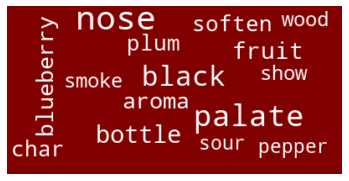

<Figure size 432x288 with 0 Axes>

Topic #2: 
+sweet         +oak           +blackberry    +flavor        +cherry        
+ripe          +soft          +smoky         +drink         +lot           
+cabernet      +like          +chocolate     +rich          +jam           



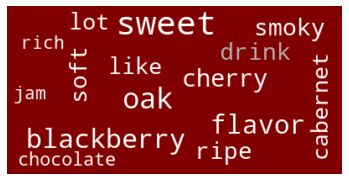

<Figure size 432x288 with 0 Axes>

Topic #3: 
+hard          +cellar        +year          +give          +currant       
+blackberry    +time          +wine          +tannic        +tannin        
+age           +dry           +cabernet      +decant        +hold          



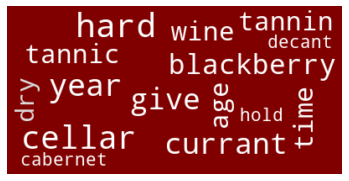

<Figure size 432x288 with 0 Axes>

Topic #4: 
+body          +full          +finish        +wine          +texture       
+flavor        +medium        +fruit         +black         +red           
+simple        +tannin        +cherry        +berry         +rustic        



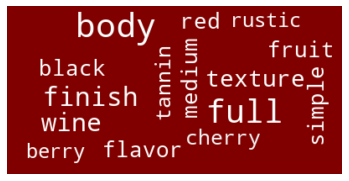

<Figure size 432x288 with 0 Axes>

Topic #5: 
+blend         +merlot        +verdot        +petit         +cabernet      
+sauvignon     +franc         +small         +malbec        +wine          
+mellow        +french        +amount        +clean         +new           



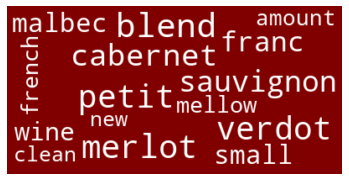

<Figure size 432x288 with 0 Axes>

Topic #6: 
+bite          +food          +touch         +concentrated  +one           
+wine          +mountain      +vineyard      +grow          +county        
+bake          +especially    +concentration +nearly        +plush         



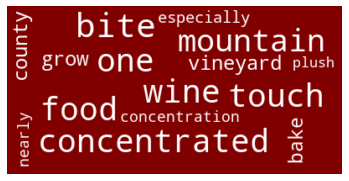

<Figure size 432x288 with 0 Axes>

Topic #7: 
+year          +dry           +flavor        +currant       +blackberry    
+next          +tannin        +cabernet      +good          +show          
+balance       +cab           +nice          +drink         +young         



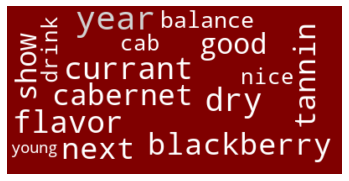

<Figure size 432x288 with 0 Axes>

Topic #8: 
+delicious     +jammy         +flavor        +quality       +cherry        
+raspberry     +sweet         +cab           +blackberry    +softly        
+soft          +chocolate     +rich          +oak           +wine          



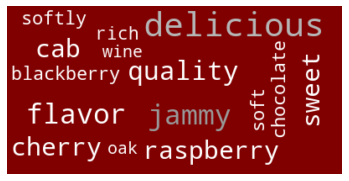

<Figure size 432x288 with 0 Axes>

Topic #9: 
+vineyard      +high          +wine          +hot           +cellaring     
+alcohol       +valley        +beautiful     +black         +heat          
+expensive     +level         +caramelize    +leathery      +warm          



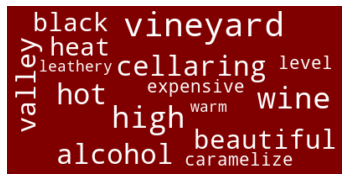

<Figure size 432x288 with 0 Axes>

In [8]:
# Class for reading and displaying topics and word clouds
from AdvancedAnalytics import TextAnalytics
import pandas as pd
# Classes for Text Preprocessing
import string
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
# sklearn methods for Preparing the Term-Doc Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# sklearn methods for Extracting Topics using the Term-Doc Matrix
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF








pd.set_option('max_colwidth', 32000)
df = pd.read_excel("CaliforniaCabernet.xlsx")
n_docs = len(df['description'])
n_samples = n_docs
m_features = None
s_words = 'english'
discussions = df['description']

# Word Frequency 
ta = TextAnalytics()
cv = CountVectorizer(max_df=0.95, min_df=2, max_features=m_features, analyzer=ta.analyzer)
tf = cv.fit_transform(discussions)

# TF/IDF matrix 
tf_idf = TfidfTransformer(norm=None, use_idf=True)
print("\nTF-IDF Parameters\n", tf_idf.get_params(),"\n")
tf = tf_idf.fit_transform(tf)


# Latent Dirichlet Analysis with TF-IDF

max_iter = 10
n_topics = 9
learning_method='online'
learning_offset=10
uv = LatentDirichletAllocation(n_components=n_topics, max_iter=max_iter,learning_method=learning_method, learning_offset=learning_offset, random_state=12345)
U = uv.fit_transform(tf)
print('{:.<22s}{:>6d}'.format("Number of Reviews", tf.shape[0]))
print('{:.<22s}{:>6d}'.format("Number of Terms", tf.shape[1]))
print("\nTopics Identified using LDA with TF_IDF")
terms = cv.get_feature_names()
TextAnalytics.display_topics(uv.components_, terms, n_terms=15, \
word_cloud=True)


In [10]:
# Store topic 
n_reviews = tf.shape[0]
topics = [0] * n_reviews
for i in range(n_reviews):
    max = abs(U[i][0])
    topics[i] = 0
    for j in range(n_topics):
        x = abs(U[i][j])
        if x > max:
            max = x
            topics[i] = j

# Merge topic
df_top = pd.DataFrame(topics, columns=["p_topic"])
df = df.join(df_top)

# Data map
attribute_map = {
    'Review':[3,(1, 14000),[0,0]],
    'description':[3,(''),[0,0]],
    'year':[3,(1900,2020),[0,0]],
    'points':[0,(1, 100),[0,0]],
    'price':[0,(1, 3000),[0,0]],
    'winery':[3,(''),[0,0]],
    'Region':[2,('South Coast', 'Sonoma', 'Sierra Foothills', 'Redwood Valley', 'Red Hills Lake County', 'North Coast', 'Napa-Sonoma', 'Napa',
    'Mendocino/Lake Counties', 'Mendocino Ridge', 'Mendocino County', 'Mendocino', 'Lake County', 'High Valley', 'Clear Lake', 'Central Valley', 
    'Central Coast', 'California Other'),[0,0]]}

avg_points = [0] * n_topics
avg_price = [0] * n_topics
t_counts = [0] * n_topics
region = {}
for r in attribute_map['Region'][1]:
    region[r] = [0, 0, 0, 0]
    
# Calculate   
for i in range(n_reviews):
    j = int(df['p_topic'].iloc[i])
    t_counts[j] += 1
    avg_points[j] += df['points'].iloc[i]
    region[df['Region'].iloc[i]][0] += df['points'].iloc[i]
    region[df['Region'].iloc[i]][1] += 1
    if pd.isnull(df['price'].iloc[i])==True:
        continue
    avg_price [j] += df['price' ].iloc[i]
    region[df['Region'].iloc[i]][2] += df['price'].iloc[i]
    region[df['Region'].iloc[i]][3] += 1
       
# Print 
print('{:<6s}{:>7s}{:>8s}{:>8s}'.format("TOPIC", "N", "POINTS", "PRICE"))
for i in range(n_topics):
    if t_counts[i]>0:
        avg_points[i] = avg_points[i]/t_counts[i]
        avg_price [i] = avg_price [i]/t_counts[i]
    print('{:>3d}{:>10d}{:>8.2f}{:>8.2f}'.format((i+1), t_counts[i], avg_points[i], avg_price[i]))

# Print Avg Points and Price by Region
print("")
print('{:<24s}{:>5s}{:>9s}{:>8s}'.format("REGION", "N", "POINTS", "PRICE"))
for r in attribute_map['Region'][1]:
    region[r][0] = region[r][0]/region[r][1] # Avg points
    region[r][2] = region[r][2]/region[r][3] # Avg price
    print('{:<24s}{:>6d}{:>8.2f}{:>8.2f}'.format(r, region[r][1], region[r][0], region[r][2]))

TOPIC       N  POINTS   PRICE
  1      1073   89.33   56.15
  2      1885   88.06   51.70
  3      2018   89.82   66.17
  4      2027   87.45   48.41
  5      1029   89.03   60.43
  6       628   89.61   60.46
  7      2479   88.96   49.05
  8      1159   87.93   50.54
  9       837   89.36   64.93

REGION                      N   POINTS   PRICE
South Coast                 52   87.04   61.37
Sonoma                    2277   88.09   41.81
Sierra Foothills           126   87.20   28.77
Redwood Valley               3   87.67   23.00
Red Hills Lake County       37   88.78   35.30
North Coast                183   86.07   21.11
Napa-Sonoma                 84   90.08   60.30
Napa                      7348   89.97   72.23
Mendocino/Lake Counties    196   86.22   27.63
Mendocino Ridge              3   86.00   40.00
Mendocino County            29   87.62   22.97
Mendocino                   30   87.27   24.80
Lake County                 34   87.74   30.50
High Valley                  3   88.67   